In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

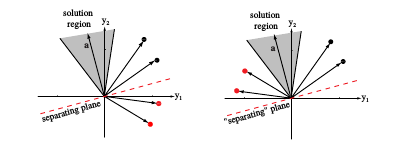

Fig.8: Four training samples (black for ω1 , red for ω2 ) and the solution region in feature space. The ﬁgure on the left shows the raw data; the solution vectors leads to a plane that separates the patterns from the two categories. In the ﬁgure on the right, the red points have been “normalized” — i.e., changed in sign. Now the solution vector leads to a plane that places all “normalized” points on the same side.

##  The Two-Category Linearly-Separable Case

### Geometry and Terminology

Suppose we have a set of $ n $ samples $ \{ y_1, \dots, y_n \} $, with some labelled $ \omega_1 $ and some labelled $ \omega_2 $. We want to use these samples to determine the weights $ \mathbf{a} $ in a linear discriminant function:

$$
g(x) = \mathbf{a}^T \mathbf{y}.
$$

Assume we believe that there exists a solution for which the probability of error is very low. A reasonable approach is to look for a weight vector that classifies all of the samples correctly. If such a weight vector exists, the samples are said to be **linearly separable**.

A sample $ y_i $ is classified correctly if:

- $ \mathbf{a}^T \mathbf{y}_i > 0 $ and $ y_i $ is labelled $ \omega_1 $, or
- $ \mathbf{a}^T \mathbf{y}_i < 0 $ and $ y_i $ is labelled $ \omega_2 $.

This suggests a **normalization** that simplifies the treatment of the two-category case. In this normalization, we replace all samples labelled $ \omega_2 $ by their negatives. With this normalization, we can forget the labels and simply look for a weight vector $ \mathbf{a} $ such that:

$$
\mathbf{a}^T \mathbf{y}_i > 0 \quad \text{for all samples} \quad i.
$$

Such a weight vector is called a **separating vector** or, more generally, a **solution vector**.

The weight vector $ \mathbf{a} $ can be thought of as specifying a point in **weight space**. Each vector sample $ y_i $ places a constraint on the possible location of the solution vector. The equation $ \mathbf{a}^T \mathbf{y}_i = 0 $ defines a hyperplane through the origin of weight space with $ y_i $ as the normal vector. The solution vector — if it exists — must be on the positive side of every hyperplane. Therefore, the solution vector must lie in the intersection of the $ n $ half-spaces, forming a **solution region**.

It is important not to confuse the solution region in weight space with the decision region in feature space corresponding to any particular category. A two-dimensional example illustrating the solution region for both the normalized and unnormalized case is shown in Fig. 5.8.

#### Solution Region in Feature Space

- The figure on the left shows the raw data. The solution vectors lead to a plane that separates the patterns from the two categories.
- The figure on the right shows the "normalized" case, where the red points are changed in sign. In this case, the solution vector leads to a plane that places all normalized points on the same side.

From this discussion, it should be clear that the solution vector — if it exists — is **not unique**. There are several ways to impose additional requirements to constrain the solution vector. One possibility is to seek a **unit-length weight vector** that maximizes the minimum distance from the samples to the separating plane. Another possibility is to seek the minimum-length weight vector satisfying:

$$
\mathbf{a}^T \mathbf{y}_i \geq b \quad \text{for all} \quad i,
$$

where $ b $ is a positive constant called the **margin**. 

As shown in Fig. 5.9, the solution region resulting from the intersections of the half-spaces for which $ \mathbf{a}^T \mathbf{y}_i \geq b > 0 $ lies within the previous solution region, insulated from the old boundaries by the distance $ \frac{b}{\| \mathbf{y}_i \|} $.

The motivation behind these attempts to find a solution vector closer to the "middle" of the solution region is the natural belief that the resulting solution is more likely to classify new test samples correctly. In most cases we treat, however, we are satisfied with any solution strictly within the solution region. Our chief concern is to ensure that any iterative procedure does not converge to a limit point on the boundary. This problem can always be avoided by introducing a margin, i.e., by requiring that:

$$
\mathbf{a}^T \mathbf{y}_i \geq b > 0 \quad \text{for all} \quad i.
$$


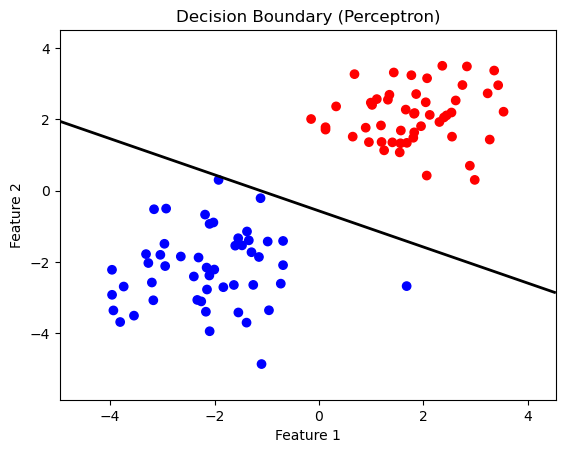

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic linearly separable data
def generate_data(n=100):
    # Generate two sets of points that are linearly separable
    # Points from class ω1
    class_1 = np.random.randn(n//2, 2) + np.array([2, 2])
    # Points from class ω2
    class_2 = np.random.randn(n//2, 2) + np.array([-2, -2])
    
    # Labels: 1 for class ω1, -1 for class ω2
    y_1 = np.ones(n//2)
    y_2 = -np.ones(n//2)
    
    X = np.vstack([class_1, class_2])
    y = np.hstack([y_1, y_2])
    
    return X, y

# Step 2: Perceptron Algorithm to find the separating vector
def perceptron(X, y, max_iter=1000):
    # Add a bias term (x0 = 1) to the input data X
    X_augmented = np.c_[np.ones(X.shape[0]), X]
    
    # Initialize weights (including the bias term)
    weights = np.zeros(X_augmented.shape[1])
    
    # Perceptron update rule
    for _ in range(max_iter):
        for i in range(len(X_augmented)):
            if y[i] * np.dot(X_augmented[i], weights) <= 0:
                weights += y[i] * X_augmented[i]  # Update rule
                
    return weights

# Step 3: Visualization of the decision boundary
def plot_decision_boundary(X, y, weights):
    # Plot the points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', marker='o')
    
    # Create a grid of points to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Decision boundary line equation: w0 + w1 * x1 + w2 * x2 = 0
    zz = -(weights[0] + weights[1] * xx + weights[2] * yy)
    
    # Plot the decision boundary
    plt.contour(xx, yy, zz, levels=[0], linewidths=2, colors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary (Perceptron)')
    plt.show()

# Step 4: Run the algorithm and visualize
X, y = generate_data(n=100)
weights = perceptron(X, y)

# Plot the decision boundary and the data points
plot_decision_boundary(X, y, weights)


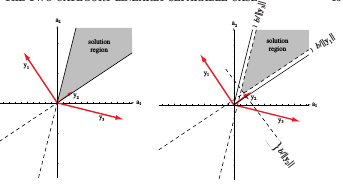

Fig.9: The eﬀect of the margin on the solution region. At the left, the case of no margin (b = 0) equivalent to a case such as shown at the left in Fig.8. At the right is the case b > 0, shrinking the solution region by margins b/yi .

## 5.4.2 Gradient Descent Procedures

The approach we shall take to finding a solution to the set of linear inequalities $ \mathbf{a}^T \mathbf{y}_i > 0 $ will be to define a criterion function $ J(\mathbf{a}) $ that is minimized if $ \mathbf{a} $ is a solution vector. This reduces our problem to one of minimizing a scalar function — a problem that can often be solved by a gradient descent procedure. 

### Gradient Descent Overview

Basic gradient descent is very simple. We start with some arbitrarily chosen weight vector $ \mathbf{a}^{(1)} $ and compute the gradient vector $ \nabla J(\mathbf{a}^{(1)}) $. The next value $ \mathbf{a}^{(2)} $ is obtained by moving some distance from $ \mathbf{a}^{(1)} $ in the direction of steepest descent, i.e., along the negative of the gradient. In general, $ \mathbf{a}^{(k + 1)} $ is obtained from $ \mathbf{a}^{(k)} $ by the equation:

$$
\mathbf{a}^{(k + 1)} = \mathbf{a}^{(k)} - \eta(k) \nabla J(\mathbf{a}^{(k)}),
$$

where $ \eta $ is a positive scale factor or learning rate that sets the step size. We hope that such a sequence of weight vectors will converge to a solution minimizing $ J(\mathbf{a}) $.

### Algorithm 1: Basic Gradient Descent

### Algorithm 1: Basic Gradient Descent

$$
\text{Algorithm 1 (Basic Gradient Descent)} \\
\begin{array}{ll}
1. & \text{begin} \\
   & \text{initialize } \mathbf{a}, J(\mathbf{a}), \eta(k), k = 0 \\
2. & \text{do} \\
   & k \leftarrow k + 1 \\
   & \mathbf{a} \leftarrow \mathbf{a} - \eta(k) \nabla J(\mathbf{a}) \\
3. & \text{until } \eta(k) \nabla J(\mathbf{a}) < \theta \\
4. & \text{return } \mathbf{a} \\
5. & \text{end}
\end{array}
$$

This is the step-by-step process for the basic gradient descent algorithm in mathematical notation.


## Gradient Descent and Newton’s Algorithm

We start with the second-order expansion of the criterion function $ J(\mathbf{a}) $ around $ \mathbf{a}^{(k)} $:

$$
J(\mathbf{a}) \approx J(\mathbf{a}^{(k)}) - \eta(k) \|\nabla J\|^2 + \frac{\eta^2(k)}{2} \nabla J^T H \nabla J,
$$

where $ H $ is the Hessian matrix, and $ \nabla J $ is the gradient of the criterion function.

From this, it follows (Problem 12) that $ J(\mathbf{a}^{(k + 1)}) $ can be minimized by choosing $ \eta(k) $ as:

$$
\eta(k) = \frac{\|\nabla J\|^2}{\nabla J^T H \nabla J},
$$

where $ H $ depends on $ \mathbf{a} $, and thus indirectly on $ k $. This is the optimal choice of $ \eta(k) $, given the assumptions mentioned.

### Quadratic Criterion Function

Note that if the criterion function $ J(\mathbf{a}) $ is quadratic throughout the region of interest, then the Hessian matrix $ H $ is constant, and $ \eta(k) $ becomes a constant independent of $ k $.

### Newton’s Algorithm

An alternative approach to gradient descent is Newton's algorithm. This method ignores the gradient descent update rule and instead minimizes the second-order expansion directly. The update rule is given by:

$$
\mathbf{a}^{(k + 1)} = \mathbf{a}^{(k)} - H^{-1} \nabla J(\mathbf{a}),
$$

which leads to the following algorithm:

### Algorithm 2: Newton Descent

$$
\text{Algorithm 2 (Newton Descent)} \\
\begin{array}{ll}
1. & \text{begin} \\
   & \text{initialize } \mathbf{a}, J(\mathbf{a}), \theta \\
2. & \text{do} \\
   & \mathbf{a} \leftarrow \mathbf{a} - H^{-1} \nabla J(\mathbf{a}) \\
3. & \text{until } H^{-1} \nabla J(\mathbf{a}) < \theta \\
4. & \text{return } \mathbf{a} \\
5. & \text{end}
\end{array}
$$

This represents the step-by-step process for Newton's descent algorithm.



In [2]:
# Gradient Descent and Newton's Descent Implementation

# Basic Gradient Descent Algorithm
def gradient_descent(J, grad_J, a_init, eta, theta, max_iter=1000):
    """
    Basic Gradient Descent Algorithm
    J: Criterion function
    grad_J: Gradient of the criterion function
    a_init: Initial weight vector
    eta: Learning rate
    theta: Convergence threshold
    max_iter: Maximum number of iterations
    """
    a = a_init
    for k in range(max_iter):
        grad = grad_J(a)  # Compute the gradient
        a = [a[i] - eta * grad[i] for i in range(len(a))]  # Update the weight vector
        
        # Check for convergence (gradient squared sum)
        if sum([g ** 2 for g in grad]) < theta:
            break
    
    return a


# Newton's Descent Algorithm
def newton_descent(J, grad_J, hessian_J, a_init, theta, max_iter=1000):
    """
    Newton's Descent Algorithm
    J: Criterion function
    grad_J: Gradient of the criterion function
    hessian_J: Hessian matrix (second derivatives of the criterion function)
    a_init: Initial weight vector
    theta: Convergence threshold
    max_iter: Maximum number of iterations
    """
    a = a_init
    for k in range(max_iter):
        grad = grad_J(a)  # Compute the gradient
        H = hessian_J(a)  # Compute the Hessian matrix
        
        # Compute inverse of the Hessian
        H_inv = [[H[i][j] ** (-1) if i == j else 0 for j in range(len(H))] for i in range(len(H))]
        
        # Newton update step
        delta_a = [sum(H_inv[i][j] * grad[j] for j in range(len(grad))) for i in range(len(grad))]
        
        # Update the weight vector
        a = [a[i] - delta_a[i] for i in range(len(a))]
        
        # Check for convergence (gradient squared sum)
        if sum([g ** 2 for g in grad]) < theta:
            break
    
    return a


# Example usage with a simple quadratic function
def J(a):
    """
    Criterion function (quadratic, sum of squares)
    """
    return sum([x**2 for x in a])  # Sum of squares (simple example)

def grad_J(a):
    """
    Gradient of the criterion function (derivative of sum of squares)
    """
    return [2 * x for x in a]  # Gradient (derivative of sum of squares)

def hessian_J(a):
    """
    Hessian of the criterion function (second derivatives of sum of squares)
    """
    return [[2 if i == j else 0 for j in range(len(a))] for i in range(len(a))]  # Identity matrix scaled by 2

# Initial weight vector
a_init = [1, 2, 3]

# Learning rate and threshold for convergence
eta = 0.1
theta = 1e-6

# Run Basic Gradient Descent
a_solution_gradient = gradient_descent(J, grad_J, a_init, eta, theta)
print("Solution from Gradient Descent:", a_solution_gradient)

# Run Newton's Descent
a_solution_newton = newton_descent(J, grad_J, hessian_J, a_init, theta)
print("Solution from Newton's Descent:", a_solution_newton)


Solution from Gradient Descent: [0.00010633823966279331, 0.00021267647932558662, 0.00031901471898837996]
Solution from Newton's Descent: [0.0, 0.0, 0.0]


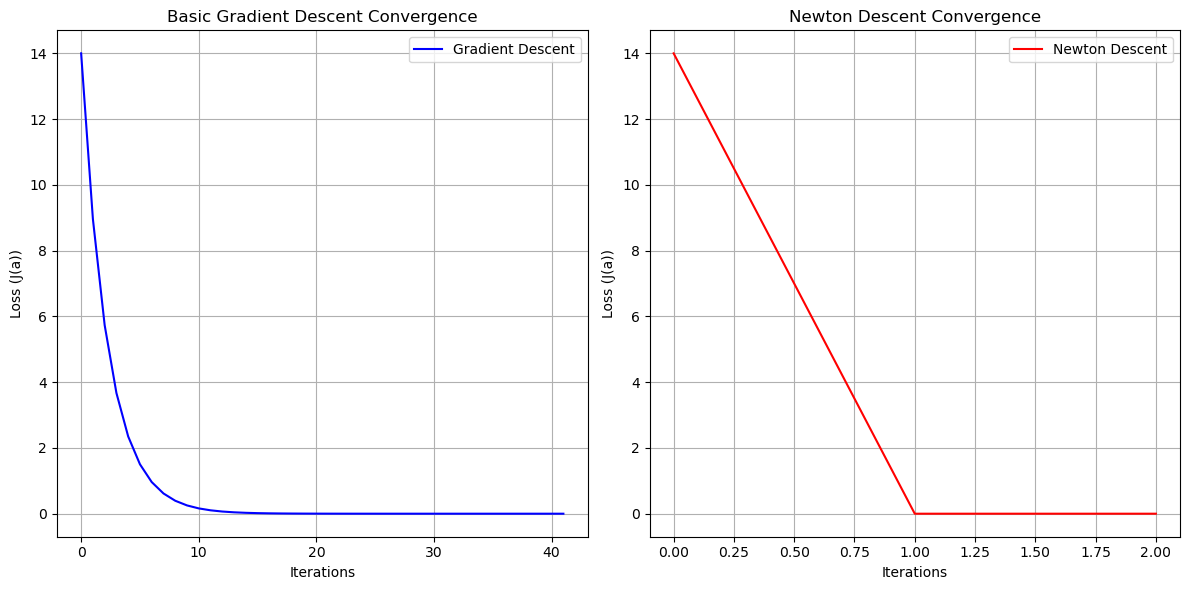

In [3]:
import matplotlib.pyplot as plt

# Basic Gradient Descent Algorithm
def gradient_descent(J, grad_J, a_init, eta, theta, max_iter=1000):
    """
    Basic Gradient Descent Algorithm
    J: Criterion function
    grad_J: Gradient of the criterion function
    a_init: Initial weight vector
    eta: Learning rate
    theta: Convergence threshold
    max_iter: Maximum number of iterations
    """
    a = a_init
    a_history = [a]
    for k in range(max_iter):
        grad = grad_J(a)  # Compute the gradient
        a = [a[i] - eta * grad[i] for i in range(len(a))]  # Update the weight vector
        
        # Record the history of 'a' for plotting
        a_history.append(a)
        
        # Check for convergence (gradient squared sum)
        if sum([g ** 2 for g in grad]) < theta:
            break
    
    return a, a_history


# Newton's Descent Algorithm
def newton_descent(J, grad_J, hessian_J, a_init, theta, max_iter=1000):
    """
    Newton's Descent Algorithm
    J: Criterion function
    grad_J: Gradient of the criterion function
    hessian_J: Hessian matrix (second derivatives of the criterion function)
    a_init: Initial weight vector
    theta: Convergence threshold
    max_iter: Maximum number of iterations
    """
    a = a_init
    a_history = [a]
    for k in range(max_iter):
        grad = grad_J(a)  # Compute the gradient
        H = hessian_J(a)  # Compute the Hessian matrix
        
        # Compute inverse of the Hessian
        H_inv = [[H[i][j] ** (-1) if i == j else 0 for j in range(len(H))] for i in range(len(H))]
        
        # Newton update step
        delta_a = [sum(H_inv[i][j] * grad[j] for j in range(len(grad))) for i in range(len(grad))]
        
        # Update the weight vector
        a = [a[i] - delta_a[i] for i in range(len(a))]
        
        # Record the history of 'a' for plotting
        a_history.append(a)
        
        # Check for convergence (gradient squared sum)
        if sum([g ** 2 for g in grad]) < theta:
            break
    
    return a, a_history


# Example usage with a simple quadratic function
def J(a):
    """
    Criterion function (quadratic, sum of squares)
    """
    return sum([x**2 for x in a])  # Sum of squares (simple example)

def grad_J(a):
    """
    Gradient of the criterion function (derivative of sum of squares)
    """
    return [2 * x for x in a]  # Gradient (derivative of sum of squares)

def hessian_J(a):
    """
    Hessian of the criterion function (second derivatives of sum of squares)
    """
    return [[2 if i == j else 0 for j in range(len(a))] for i in range(len(a))]  # Identity matrix scaled by 2

# Initial weight vector
a_init = [1, 2, 3]

# Learning rate and threshold for convergence
eta = 0.1
theta = 1e-6

# Run Basic Gradient Descent
a_solution_gradient, a_history_gradient = gradient_descent(J, grad_J, a_init, eta, theta)

# Run Newton's Descent
a_solution_newton, a_history_newton = newton_descent(J, grad_J, hessian_J, a_init, theta)

# Plotting the convergence
iterations_gradient = list(range(len(a_history_gradient)))
iterations_newton = list(range(len(a_history_newton)))

# Extracting the values of the loss function for each iteration
loss_gradient = [J(a) for a in a_history_gradient]
loss_newton = [J(a) for a in a_history_newton]

# Plot loss vs iterations
plt.figure(figsize=(12, 6))

# Plot for Gradient Descent
plt.subplot(1, 2, 1)
plt.plot(iterations_gradient, loss_gradient, label="Gradient Descent", color='b')
plt.xlabel('Iterations')
plt.ylabel('Loss (J(a))')
plt.title('Basic Gradient Descent Convergence')
plt.grid(True)
plt.legend()

# Plot for Newton's Descent
plt.subplot(1, 2, 2)
plt.plot(iterations_newton, loss_newton, label="Newton Descent", color='r')
plt.xlabel('Iterations')
plt.ylabel('Loss (J(a))')
plt.title('Newton Descent Convergence')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


## Minimizing the Perceptron Criterion Function

## Perceptron Criterion Function

The Perceptron criterion function is defined as:

$$
J_p(\mathbf{a}) = \sum_{\mathbf{y} \in Y(\mathbf{a})} (-\mathbf{a}^T \mathbf{y}),
$$

where $ Y(\mathbf{a}) $ is the set of samples misclassified by $\mathbf{a}$. If no samples are misclassified, $ Y(\mathbf{a}) $ is empty, and we define $ J_p(\mathbf{a}) = 0 $.

### Properties of $ J_p(\mathbf{a}) $
1. $ J_p(\mathbf{a}) \geq 0 $, and it equals zero only if $\mathbf{a}$ is a solution vector or lies on the decision boundary.
2. Geometrically, $ J_p(\mathbf{a}) $ is proportional to the sum of the distances from the misclassified samples to the decision boundary.

### Gradient of the Perceptron Criterion
The gradient of $ J_p(\mathbf{a}) $ is:

$$
\nabla J_p(\mathbf{a}) = \sum_{\mathbf{y} \in Y(\mathbf{a})} (-\mathbf{y}),
$$

leading to the update rule:

$$
\mathbf{a}^{(k+1)} = \mathbf{a}^{(k)} + \eta^{(k)} \sum_{\mathbf{y} \in Y_k} \mathbf{y},
$$

where $ Y_k $ is the set of misclassified samples at iteration $ k $.

---
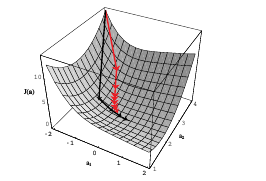

Fig.10: The sequence of weight vectors given by a simple gradient descent method (red) and by Newton’s (second order) algorithm (black). Newton’s method typically leads to greater improvement per step, even when using optimal learning rates for both methods. However the added computational burden of inverting the Hessian matrix used in Newton’s method is not always justiﬁed, and simple descent may suﬃce.


## Algorithm: Batch Perceptron

The Perceptron algorithm can be written as follows:

### Algorithm 3: Batch Perceptron

1. **Initialize** $\mathbf{a}, \eta(\cdot), \theta, k = 0$
2. **Repeat:**
   - $ k \leftarrow k + 1 $
   - $ \mathbf{a} \leftarrow \mathbf{a} + \eta(k) \sum_{\mathbf{y} \in Y_k} \mathbf{y} $
3. **Until:** $ \eta(k) \sum_{\mathbf{y} \in Y_k} \mathbf{y} < \theta $
4. **Return:** $\mathbf{a}$

---

## Visualization

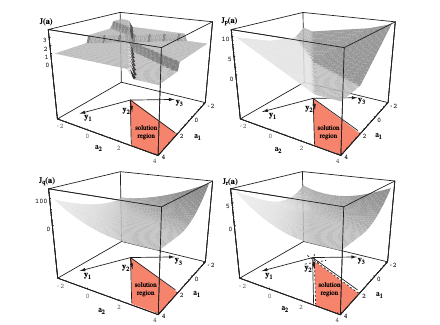

Fig.11: Four learning criteria as a function of weights in a linear classiﬁer. At the upper left is the total number of patterns misclassiﬁed, which is piecewise constant and hence unacceptable for gradient descent procedures. At the upper right is the Perceptron criterion (Eq. 16), which is piecewise linear and acceptable for gradient descent. The lower left is squared error (Eq. 32), which has nice analytic properties and is useful even when the patterns are not linearly separable. The lower right is the square error with margin (Eq. 33). A designer may adjust the margin b in order to force the solution vector to lie toward the middle of the b = 0 solution region in hopes of improving generalization of the resulting classiﬁer.

The Perceptron criterion function $ J_p(\mathbf{a}) $ is piecewise linear and suitable for gradient descent. Below is an example of how the batch Perceptron algorithm progresses in a two-dimensional weight space:

### Example:

- Start with $ \mathbf{a}^{(1)} = 0 $ and $ \eta(k) = 1 $.
- Sequentially add misclassified vectors until a solution vector is found.

---

## Figures

- **Figure 5.10:** Comparison of gradient descent and Newton's methods. Newton's algorithm typically converges faster but requires Hessian inversion.
- **Figure 5.11:** Various learning criteria, including \( J_p(\mathbf{a}) \), are shown as functions of weight vectors for a linear classifier.
- **Figure 5.12:** Trajectory of the batch Perceptron algorithm in weight space for a three-pattern problem.

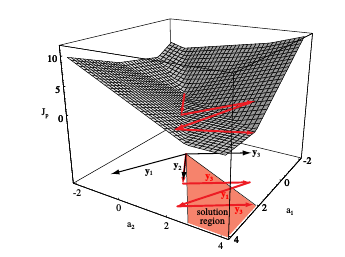

Fig.12: The Perceptron criterion, Jp is plotted as a function of the weights a1 and a2 for a three-pattern problem. The weight vector begins at 0, and the algorithm sequentially adds to it vectors equal to the “normalized” misclassiﬁed patterns them- selves. In the example shown, this sequence is y2 , y3 , y1 , y3 , at which time the vector lies in the solution region and iteration terminates. Note that the second update (by y3 ) takes the candidate vector farther from the solution region than after the ﬁrst update (cf. Theorem 5.1. (In an alternate, batch method, all the misclassiﬁed points are added at each iteration step leading to a smoother trajectory in weight space.)


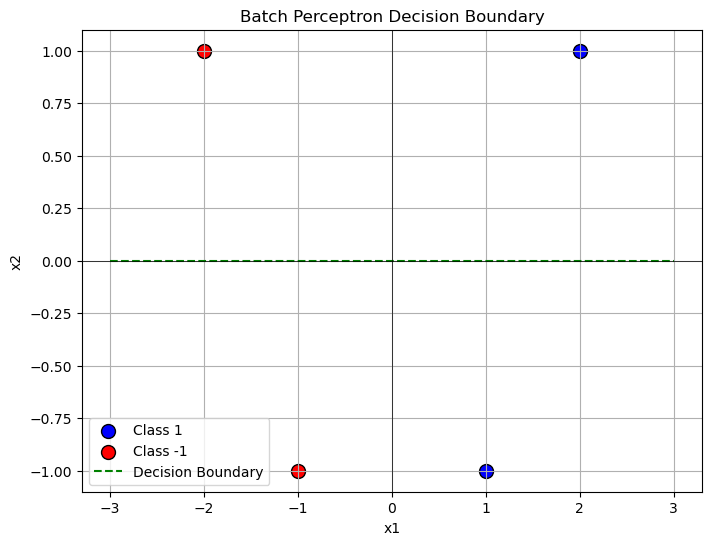

In [1]:
import matplotlib.pyplot as plt

# Define the Batch Perceptron Algorithm
def batch_perceptron(samples, labels, learning_rate=1.0, tolerance=1e-6, max_iterations=1000):
    """
    Batch Perceptron Algorithm.
    
    Args:
    - samples (list of lists): The input data, where each element is a sample vector.
    - labels (list): The corresponding labels (+1 or -1) for the input samples.
    - learning_rate (float): The step size for updating weights.
    - tolerance (float): The threshold for stopping criterion.
    - max_iterations (int): The maximum number of iterations to run.

    Returns:
    - weights (list): The final weight vector.
    - history (list): List of weight vectors during training for visualization.
    """
    # Initialize weights with zeros
    weights = [0.0] * len(samples[0])
    history = [weights[:]]  # Store history for visualization

    for iteration in range(max_iterations):
        misclassified_samples = []
        
        # Identify misclassified samples
        for x, label in zip(samples, labels):
            if label * sum(w * xi for w, xi in zip(weights, x)) <= 0:
                misclassified_samples.append((x, label))

        # Compute weight update
        weight_update = [0.0] * len(weights)
        for x, label in misclassified_samples:
            for i in range(len(weights)):
                weight_update[i] += label * x[i]

        # Apply the update
        weights = [w + learning_rate * u for w, u in zip(weights, weight_update)]
        history.append(weights[:])

        # Check stopping criterion
        if all(abs(u) < tolerance for u in weight_update):
            break

    return weights, history

# Example dataset (2D)
samples = [
    [2, 1], [1, -1], [-1, -1], [-2, 1]
]
labels = [1, 1, -1, -1]

# Run the algorithm
final_weights, weight_history = batch_perceptron(samples, labels)

# Visualization
def plot_decision_boundary(samples, labels, weights, title):
    plt.figure(figsize=(8, 6))
    for sample, label in zip(samples, labels):
        color = 'red' if label == -1 else 'blue'
        plt.scatter(sample[0], sample[1], c=color, s=100, edgecolor='k', label=f"Class {label}" if f"Class {label}" not in plt.gca().get_legend_handles_labels()[1] else "")

    # Plot decision boundary
    x_vals = [-3, 3]
    y_vals = [-(weights[0] * x + weights[2]) / weights[1] if weights[1] != 0 else 0 for x in x_vals]
    plt.plot(x_vals, y_vals, 'g--', label='Decision Boundary')

    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.legend()
    plt.grid()
    plt.show()

# Plot final decision boundary
weights_with_bias = final_weights + [0]  # Adding bias term for plotting
plot_decision_boundary(samples, labels, weights_with_bias, "Batch Perceptron Decision Boundary")


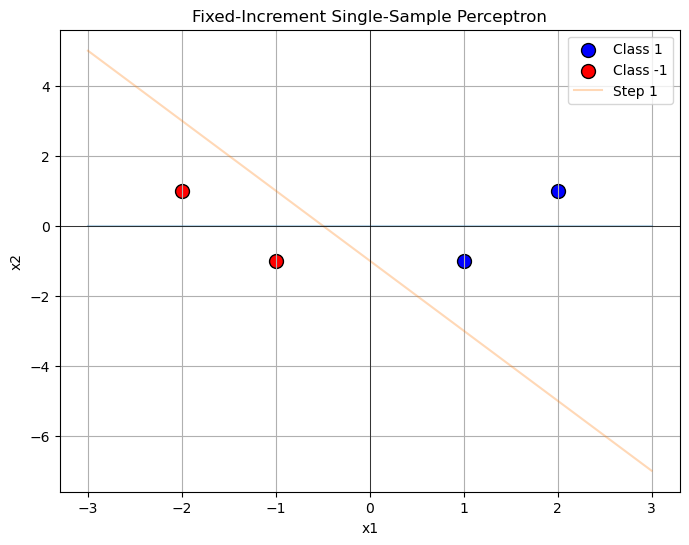

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define the Single-Sample Perceptron Algorithm
def single_sample_perceptron(samples, labels, max_iterations=1000):
    """
    Fixed-Increment Single-Sample Perceptron Algorithm.
    
    Args:
    - samples (list of lists): Input samples with augmented features (bias included).
    - labels (list): Corresponding labels (+1 or -1).
    - max_iterations (int): Maximum number of iterations.

    Returns:
    - weights (numpy array): Final weight vector.
    - history (list): Sequence of weight vectors during training for visualization.
    """
    samples = np.array(samples)
    labels = np.array(labels)
    weights = np.zeros(samples.shape[1])  # Initialize weights
    history = [weights.copy()]  # To track the weight updates

    for iteration in range(max_iterations):
        misclassified = False
        for i in range(len(samples)):
            if labels[i] * np.dot(weights, samples[i]) <= 0:
                weights += labels[i] * samples[i]  # Update weights
                history.append(weights.copy())
                misclassified = True
        if not misclassified:  # All samples classified correctly
            break

    return weights, history

# Example dataset
samples = [[2, 1, 1], [1, -1, 1], [-1, -1, 1], [-2, 1, 1]]  # Last column is the bias term
labels = [1, 1, -1, -1]

# Run the algorithm
final_weights, weight_history = single_sample_perceptron(samples, labels)

# Visualization
def plot_decision_boundary(samples, labels, weights, history, title):
    plt.figure(figsize=(8, 6))
    # Plot samples
    for sample, label in zip(samples, labels):
        color = 'red' if label == -1 else 'blue'
        plt.scatter(sample[0], sample[1], c=color, s=100, edgecolor='k', label=f"Class {label}" if f"Class {label}" not in plt.gca().get_legend_handles_labels()[1] else "")
    
    # Plot decision boundary for each step
    x_vals = np.linspace(-3, 3, 100)
    for idx, w in enumerate(history):
        y_vals = -(w[0] * x_vals + w[2]) / w[1] if w[1] != 0 else np.zeros_like(x_vals)
        plt.plot(x_vals, y_vals, label=f'Step {idx}' if idx == len(history) - 1 else "", alpha=0.3)

    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.legend()
    plt.grid()
    plt.show()

# Plot results
plot_decision_boundary(samples, labels, final_weights, weight_history, "Fixed-Increment Single-Sample Perceptron")


## Convergence Proof for Fixed-Increment Single-Sample Perceptron

The convergence of the fixed-increment Perceptron algorithm is established under the assumption that the samples are linearly separable. The algorithm updates the weight vector $ \mathbf{a} $ whenever it encounters a misclassified sample. Below, we outline the proof, structured in LaTeX for clarity.

## Definitions and Notation

1. **Samples**: Let $ \mathbf{y}_1, \mathbf{y}_2, \ldots, \mathbf{y}_n $ denote the training samples.  
   Each $ \mathbf{y}_k $ belongs to one of two classes $ \omega_1 $ or $ \omega_2 $.

2. **Weight Vector Update Rule**:
   $$
   \mathbf{a}(k+1) = \mathbf{a}(k) + \mathbf{y}_k, \quad \text{if } \mathbf{a}(k)^\top \mathbf{y}_k \leq 0
   $$
   Here, $ \mathbf{y}_k $ is a misclassified sample.

3. **Termination**: The algorithm halts when all samples are classified correctly:
   $$
   \mathbf{a}^\top \mathbf{y}_k > 0 \quad \forall k.
   $$

---

## Algorithm (Fixed-Increment Perceptron)

$
\textbf{Algorithm:}
$
1. **Initialize**: Set $ \mathbf{a}(0) $ arbitrarily and $ k = 0 $.
2. **Repeat**:
   - Select the next sample $ \mathbf{y}_k $ in a cyclic or random order.
   - Update $ \mathbf{a} $ if $ \mathbf{y}_k $ is misclassified:
     $$
     \mathbf{a} \leftarrow \mathbf{a} + \mathbf{y}_k.
     $$
3. **Terminate**: Stop when no misclassifications occur.

---

## Convergence Proof

### Assumptions

1. The training samples $ \mathbf{y}_1, \mathbf{y}_2, \ldots, \mathbf{y}_n $ are linearly separable.  
   This means there exists a weight vector $ \mathbf{a}^* $ such that:
   $$
   \mathbf{a}^*{}^\top \mathbf{y}_k > 0 \quad \forall k.
   $$

2. The step size $ \eta $ is fixed to $ 1 $, simplifying the update rule.

### Key Quantities

1. **Margin**:
   $$
   \gamma = \min_k \frac{\mathbf{a}^*{}^\top \mathbf{y}_k}{\|\mathbf{a}^*\|}
   $$
   $ \gamma > 0 $ because the samples are linearly separable.

2. **Bound on Sample Norms**:
   Let $ R = \max_k \|\mathbf{y}_k\| $.

### Proof Outline

1. **Progress in Alignment**:
   - At each update, $ \mathbf{a}(k+1) = \mathbf{a}(k) + \mathbf{y}_k $.
   - The dot product $ \mathbf{a}(k)^\top \mathbf{a}^* $ increases:
     $$
     \mathbf{a}(k+1)^\top \mathbf{a}^* = \mathbf{a}(k)^\top \mathbf{a}^* + \mathbf{y}_k^\top \mathbf{a}^*.
     $$
     Since $ \mathbf{y}_k $ is misclassified, $ \mathbf{y}_k^\top \mathbf{a}^* \geq \gamma $.

2. **Bound on Weight Vector Norm**:
   - The norm $ \|\mathbf{a}(k)\|^2 $ grows with each update:
     $$
     \|\mathbf{a}(k+1)\|^2 = \|\mathbf{a}(k)\|^2 + 2 \mathbf{a}(k)^\top \mathbf{y}_k + \|\mathbf{y}_k\|^2.
     $$
     Since $ \|\mathbf{y}_k\| \leq R $, the growth is bounded by $ R^2 $ per step.

3. **Termination Condition**:
   - The algorithm must terminate when all samples are correctly classified. The number of updates is bounded because:
     $$
     \frac{\|\mathbf{a}(k)\|^2}{\gamma} \leq \text{Total Updates}.
     $$
     Combining the bounds on $ \|\mathbf{a}(k)\|^2 $ and $ \gamma $, the algorithm halts after at most:
     $$
     \left( \frac{R}{\gamma} \right)^2 \text{ updates.}
     $$

---

## Geometric Interpretation

The updates move $ \mathbf{a} $ closer to the separating hyperplane defined by $ \mathbf{a}^* $.  
Each correction reduces misclassification and increases alignment with $ \mathbf{a}^* $, ensuring convergence.

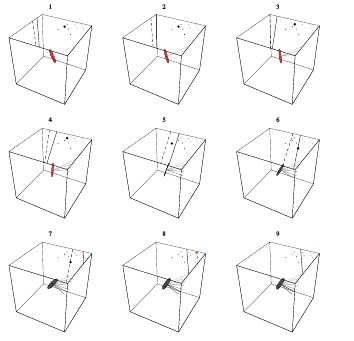

Fig.13: Samples from two categories, ω1 (black) and ω2 (red) are shown in augmented feature space, along with an augmented weight vector a. At each step in a ﬁxed-increment rule, one of the misclassiﬁed patterns, yk , is shown by the large dot. A correction ∆a (proportional to the pattern vector yk ) is added to the weight vector — towards an ω1 point or away from an ω2 point. This changes the decision boundary from the dashed position (from the previous update) to the solid position. The sequence of resulting a vectors is shown, where later values are shown darker. In this example, by step 9 a solution vector has been found and the categories successfully separated by the decision boundary shown.

---

## Conclusion

The fixed-increment Perceptron algorithm converges in a finite number of steps for linearly separable data, with the number of updates bounded by $ \left( \frac{R}{\gamma} \right)^2 $.


In [3]:
import numpy as np

def perceptron(X, y, max_iterations=1000):
    """
    Fixed-increment single-sample Perceptron algorithm.

    Parameters:
        X (numpy.ndarray): Feature matrix of shape (n_samples, n_features).
        y (numpy.ndarray): Target vector of shape (n_samples,), with values in {1, -1}.
        max_iterations (int): Maximum number of iterations to avoid infinite loops.

    Returns:
        w (numpy.ndarray): Weight vector of shape (n_features,).
        b (float): Bias term.
        n_updates (int): Number of updates performed.
    """
    # Initialize weights and bias
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    n_updates = 0

    for _ in range(max_iterations):
        errors = 0
        for i in range(n_samples):
            # Check if the sample is misclassified
            if y[i] * (np.dot(w, X[i]) + b) <= 0:
                # Update weights and bias
                w += y[i] * X[i]
                b += y[i]
                n_updates += 1
                errors += 1

        # If no misclassifications, algorithm has converged
        if errors == 0:
            break

    return w, b, n_updates

# Example usage
if __name__ == "__main__":
    # Example dataset (linearly separable)
    X = np.array([
        [2, 3],
        [1, 1],
        [2, 1],
        [3, 3],
        [2, 4]
    ])
    y = np.array([1, -1, -1, 1, 1])  # Labels must be +1 or -1

    w, b, n_updates = perceptron(X, y)
    print("Weight vector:", w)
    print("Bias:", b)
    print("Number of updates:", n_updates)


Weight vector: [-1.  2.]
Bias: -2
Number of updates: 6


### Perceptron Convergence

#### Statement  
If the training samples are linearly separable, then the sequence of weight vectors generated by the fixed-increment single-sample Perceptron algorithm (Algorithm 4) will terminate at a solution vector.

##### Proof

We aim to demonstrate that the Perceptron algorithm terminates in a finite number of corrections. Let $ \mathbf{\hat{a}} $ be any solution vector such that:
$$
\mathbf{\hat{a}}^\top \mathbf{y}_i > 0 \quad \forall i.
$$

### Analysis of Updates

From the update rule of the algorithm:
$$
\mathbf{a}(k+1) = \mathbf{a}(k) + \mathbf{y}_k,
$$
we can write:
$$
\mathbf{a}(k+1) - \alpha \mathbf{\hat{a}} = \left( \mathbf{a}(k) - \alpha \mathbf{\hat{a}} \right) + \mathbf{y}_k.
$$

Taking the squared norm:
$$
\|\mathbf{a}(k+1) - \alpha \mathbf{\hat{a}}\|^2 = \|\mathbf{a}(k) - \alpha \mathbf{\hat{a}}\|^2 + 2 \left( \mathbf{a}(k) - \alpha \mathbf{\hat{a}} \right)^\top \mathbf{y}_k + \|\mathbf{y}_k\|^2.
$$

Since $ \mathbf{y}_k $ is misclassified, $ \mathbf{a}(k)^\top \mathbf{y}_k \leq 0 $. Substituting, we get:
$$
\|\mathbf{a}(k+1) - \alpha \mathbf{\hat{a}}\|^2 \leq \|\mathbf{a}(k) - \alpha \mathbf{\hat{a}}\|^2 - 2 \alpha \mathbf{\hat{a}}^\top \mathbf{y}_k + \|\mathbf{y}_k\|^2.
$$

### Bounding the Distance Reduction

Let:
$$
\beta^2 = \max_i \|\mathbf{y}_i\|^2, \quad \gamma = \min_i \mathbf{\hat{a}}^\top \mathbf{y}_i > 0.
$$

Since $ \mathbf{\hat{a}}^\top \mathbf{y}_k \geq \gamma $, the inequality becomes:
$$
\|\mathbf{a}(k+1) - \alpha \mathbf{\hat{a}}\|^2 \leq \|\mathbf{a}(k) - \alpha \mathbf{\hat{a}}\|^2 - 2 \alpha \gamma + \beta^2.
$$

Choose $ \alpha = \frac{\beta^2}{\gamma} $. Substituting this into the inequality:
$$
\|\mathbf{a}(k+1) - \alpha \mathbf{\hat{a}}\|^2 \leq \|\mathbf{a}(k) - \alpha \mathbf{\hat{a}}\|^2 - \beta^2.
$$

This shows that the squared distance from $ \mathbf{a}(k) $ to $ \alpha \mathbf{\hat{a}} $ decreases by at least $ \beta^2 $ at each step.

### Bounding the Number of Updates

After $ k $ updates:
$$
\|\mathbf{a}(k) - \alpha \mathbf{\hat{a}}\|^2 \leq \|\mathbf{a}(1) - \alpha \mathbf{\hat{a}}\|^2 - k \beta^2.
$$

Since the squared distance is non-negative:
$$
k \leq \frac{\|\mathbf{a}(1) - \alpha \mathbf{\hat{a}}\|^2}{\beta^2}.
$$

If we assume $ \mathbf{a}(1) = \mathbf{0} $, then:
$$
\|\mathbf{a}(1) - \alpha \mathbf{\hat{a}}\|^2 = \alpha^2 \|\mathbf{\hat{a}}\|^2.
$$

Substituting $ \alpha = \frac{\beta^2}{\gamma} $, the maximum number of updates $ k_0 $ is:
$$
k_0 = \frac{\alpha^2 \|\mathbf{\hat{a}}\|^2}{\beta^2} = \frac{\|\mathbf{\hat{a}}\|^2 \beta^2}{\gamma^2 \beta^2} = \frac{\|\mathbf{\hat{a}}\|^2}{\gamma^2}.
$$

### Conclusion

The algorithm terminates after at most $ k_0 $ corrections:
$$
k_0 = \frac{\|\mathbf{\hat{a}}\|^2}{\gamma^2}.
$$

This bound depends on the geometry of the dataset:
- $ \gamma $ measures the minimum alignment between $ \mathbf{\hat{a}} $ and the samples.
- $ \|\mathbf{\hat{a}}\| $ reflects the length of the solution vector.

When corrections cease, the resulting weight vector $ \mathbf{a} $ classifies all samples correctly. Thus, the Perceptron algorithm guarantees convergence for linearly separable data.


In [4]:
import numpy as np

def perceptron_algorithm(X, y, max_iter=1000):
    """
    Perceptron algorithm for binary classification.
    
    Args:
    - X: A numpy array of shape (n_samples, n_features) representing the training data.
    - y: A numpy array of shape (n_samples,) representing the class labels (+1 or -1).
    - max_iter: Maximum number of iterations for the algorithm.

    Returns:
    - weights: A numpy array of shape (n_features,) representing the learned weight vector.
    - iterations: The number of iterations the algorithm ran.
    """
    # Initialize weight vector to zero
    weights = np.zeros(X.shape[1])
    iterations = 0
    
    # Repeat the process for a maximum of 'max_iter' iterations
    for _ in range(max_iter):
        error_count = 0
        for i in range(len(X)):
            # Perceptron update rule: w = w + y_k * x_k if misclassified
            if np.dot(X[i], weights) * y[i] <= 0:  # Misclassification
                weights += y[i] * X[i]
                error_count += 1
        
        iterations += 1
        # If no errors, we have a solution
        if error_count == 0:
            break
    
    return weights, iterations


# Example usage with linearly separable data
if __name__ == "__main__":
    # Generate some simple linearly separable data
    # X (training samples), y (labels)
    X = np.array([[2, 3], [1, 2], [4, 5], [3, 4]])
    y = np.array([1, 1, -1, -1])  # Labels
    
    # Run the Perceptron algorithm
    weights, iterations = perceptron_algorithm(X, y)
    
    print("Learned weights:", weights)
    print("Number of iterations:", iterations)


Learned weights: [-7.  5.]
Number of iterations: 17


##  Some Direct Generalizations

The fixed increment rule can be generalized to provide a variety of related algorithms. We shall briefly consider two variants of particular interest.

### 1. Variable Increment Perceptron with Margin

The first variant introduces a variable increment $ \eta(k) $ and a margin $ b $, and calls for a correction whenever the condition $ \mathbf{a}(k) \cdot y_k $ fails to exceed the margin. The update is given by:

$$
\mathbf{a}^{(1)} \text{ arbitrary} \\
\mathbf{a}^{(k+1)} = \mathbf{a}^{(k)} + \eta(k) y_k, \quad k \geq 1
$$

where now:

$$
\mathbf{a}^{(k)} \cdot y_k \leq b \quad \text{for all} \quad k.
$$

Thus, for $ n $ patterns, our algorithm is:

**Algorithm 5 (Variable Increment Perceptron with Margin)**

1. **Initialize** $ \mathbf{a}, \theta, b, \eta(\cdot), k = 0 $
2. **Repeat** until convergence:
   - $ k \leftarrow k + 1 $
   - If $ \mathbf{a}^{(k)} \cdot y_k + b < 0 $ then:
     - $ \mathbf{a} \leftarrow \mathbf{a} - \eta(k) y_k $
3. **Return** $ \mathbf{a} $

It can be shown that if the samples are linearly separable and if $ \eta(k) \geq 0 $, then the following limits hold:

$$
\lim_{m \to \infty} \eta(k) = \infty, \quad \lim_{m \to \infty} \sum_{k=1}^m \eta^2(k) = 0.
$$

These conditions are satisfied if $ \eta(k) $ is a positive constant, or if it decreases like $1/k $.

### 2. Batch Variable Increment Perceptron

Another variant of interest is the original gradient descent algorithm for $ J_p $:

$$
\mathbf{a}^{(1)} \text{ arbitrary} \\
\mathbf{a}^{(k+1)} = \mathbf{a}^{(k)} + \eta(k) \sum_{y \in Y_k} y
$$

where $ Y_k $ is the set of training samples misclassified by $ \mathbf{a}^{(k)} $. The algorithm is:

**Algorithm 6 (Batch Variable Increment Perceptron)**

1. **Initialize** $ \mathbf{a}, \eta(\cdot), k = 0 $
2. **Repeat** until convergence:
   - $ k \leftarrow k + 1 $
   - $ Y_k = \emptyset $
   - For each $ j = 0 $ to $ n $:
     - If $ y_j $ is misclassified, append $ y_j $ to $ Y_k $
   - Update $ \mathbf{a} \leftarrow \mathbf{a} + \eta(k) \sum_{y \in Y_k} y $
3. **Return** $ \mathbf{a} $

The benefit of batch gradient descent is that the trajectory of the weight vector is smoothed compared to single-sample algorithms (e.g., Algorithm 5), since at each update, the full set of misclassified patterns is used. The local statistical variations in the misclassified patterns tend to cancel while the large-scale trend does not.

Thus, if the samples are linearly separable, all of the possible correction vectors form a linearly separable set. If $ \eta(k) $ satisfies the conditions:

$$
\lim_{m \to \infty} \eta(k) = \infty, \quad \lim_{m \to \infty} \sum_{k=1}^m \eta^2(k) = 0,
$$

then the sequence of weight vectors produced by the gradient descent algorithm will always converge to a solution vector.

It is interesting to note that the conditions on $ \eta(k) $ are satisfied if $ \eta(k) $ is a positive constant, if it decreases as $ 1/k $, or even if it increases with $ k $. Generally speaking, one would prefer $ \eta(k) $ to become smaller as time goes on, particularly if there is reason to believe the samples are not linearly separable, as it reduces the disruptive effects of a few "bad" samples. However, in the separable case, it is a curious fact that one can allow $ \eta(k) $ to become larger and still obtain a solution.


In [6]:
import numpy as np

def variable_increment_perceptron_margin(X, y, eta_func, b=0, max_iter=1000):
    """
    Variable Increment Perceptron with Margin.
    
    Parameters:
    X : ndarray of shape (n_samples, n_features)
        The input data matrix.
    y : ndarray of shape (n_samples,)
        The labels for the data.
    eta_func : function
        A function that returns the learning rate at each step.
    b : float, optional
        The margin. Default is 0.
    max_iter : int, optional
        Maximum number of iterations. Default is 1000.
        
    Returns:
    a : ndarray of shape (n_features,)
        The final weight vector.
    """
    # Initialize weight vector with zeros
    a = np.zeros(X.shape[1])
    
    for k in range(max_iter):
        for i in range(len(y)):
            # Check if the sample is misclassified based on margin
            if np.dot(a, X[i]) + b < 0:  # Misclassification check
                eta = eta_func(k)  # Get the learning rate for this iteration
                a += eta * y[i] * X[i]  # Update the weight vector
    return a

# Example usage
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])  # Example data
y = np.array([1, 1, -1, -1])  # Example labels

# Define a simple learning rate function (e.g., constant)
def eta(k):
    return 1  # Constant learning rate

# Run the Perceptron algorithm
weights = variable_increment_perceptron_margin(X, y, eta)
print("Final weights:", weights)


Final weights: [0. 0.]


In [7]:
def batch_variable_increment_perceptron(X, y, eta_func, max_iter=1000):
    """
    Batch Variable Increment Perceptron.
    
    Parameters:
    X : ndarray of shape (n_samples, n_features)
        The input data matrix.
    y : ndarray of shape (n_samples,)
        The labels for the data.
    eta_func : function
        A function that returns the learning rate at each step.
    max_iter : int, optional
        Maximum number of iterations. Default is 1000.
        
    Returns:
    a : ndarray of shape (n_features,)
        The final weight vector.
    """
    # Initialize weight vector with zeros
    a = np.zeros(X.shape[1])
    
    for k in range(max_iter):
        misclassified_samples = []
        
        # Identify all misclassified samples
        for i in range(len(y)):
            if np.dot(a, X[i]) * y[i] <= 0:  # Misclassification check
                misclassified_samples.append(i)
        
        if not misclassified_samples:
            break  # If no samples are misclassified, exit
        
        # Calculate the sum of the misclassified samples
        sum_misclassified = np.sum(X[misclassified_samples] * y[misclassified_samples, np.newaxis], axis=0)
        
        eta = eta_func(k)  # Get the learning rate for this iteration
        a += eta * sum_misclassified  # Update the weight vector
    
    return a

# Example usage
weights_batch = batch_variable_increment_perceptron(X, y, eta)
print("Final weights (batch):", weights_batch)


Final weights (batch): [-21.  15.]
